In [1]:
import geojson
import folium
import numpy as np
import geopandas as gpd
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt

In [2]:

m = folium.Map(location = [18.33952, -66.780384], zoom_start = 9)
boundsdata = r'C:\python_workfolder\PR.json'
folium.GeoJson(boundsdata).add_to(m)
m

In [3]:
#connect to api
user = 'inigop'
password = 'Simba0109'
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [4]:
#search by polygon
footprint = geojson_to_wkt(read_geojson(boundsdata))
print(footprint)

POLYGON((-67.2556 17.9186,-65.5911 17.9186,-65.5911 18.5656,-67.2556 18.5656,-67.2556 17.9186))


In [5]:
#search for image
products = api.query(footprint,
                     date = ('20150701', '20160101'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1c',
                     cloudcoverpercentage = (0, 5))
print(len(products))

10


e5eb3cb2-f6e7-4b6c-aa75-96e051f89360    Annotation(-67.5154, 17.742, 'e5eb3cb2-f6e7-4b...
36a6c3a5-b1ab-4ed3-9f19-fe76f86073e1    Annotation(-65.6575, 17.5643, '36a6c3a5-b1ab-4...
82390457-7664-45ba-9c6e-fdb322f54c59    Annotation(-66.5988, 17.578, '82390457-7664-45...
363e871c-6702-4441-ac79-faa330b2c715    Annotation(-66.5865, 18.4807, '363e871c-6702-4...
20a1d320-d895-496c-8ce3-02f15e14b4cc    Annotation(-67.5328, 18.4904, '20a1d320-d895-4...
caeda826-5bb9-47b1-aca2-28a399169c09    Annotation(-65.6404, 18.4663, 'caeda826-5bb9-4...
01be6516-3d1d-4d15-8874-c52c5152a3fc    Annotation(-65.3095, 17.5791, '01be6516-3d1d-4...
cfa7f48f-da0b-439f-9f11-6f1fb22afd73    Annotation(-65.3213, 18.4819, 'cfa7f48f-da0b-4...
b4480b26-0d66-4329-b4e1-8eeead6b38c6    Annotation(-67.5328, 18.4904, 'b4480b26-0d66-4...
e4001997-317a-4b7d-af8c-5a40e587e0c1    Annotation(-67.5403, 17.5872, 'e4001997-317a-4...
dtype: object

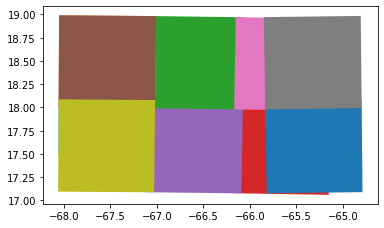

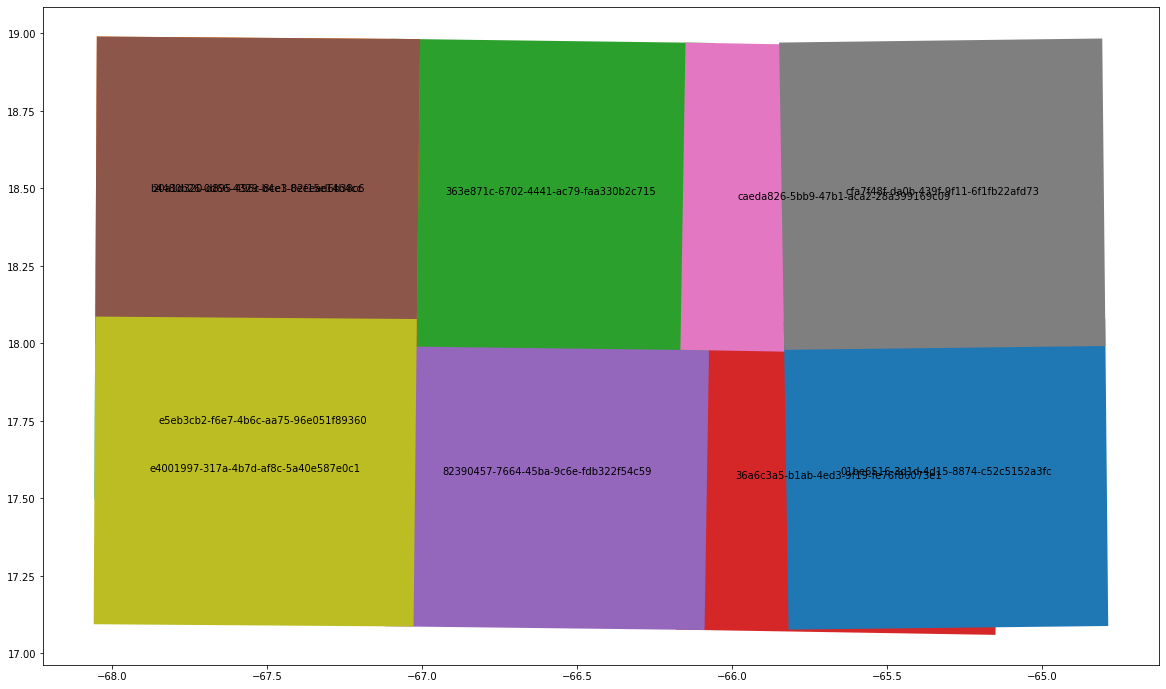

In [6]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)
ax = areas.plot(column = 'uuid', cmap = None, figsize = (20,20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy = x.geometry.centroid.coords[0], ha = 'center'), axis =1)

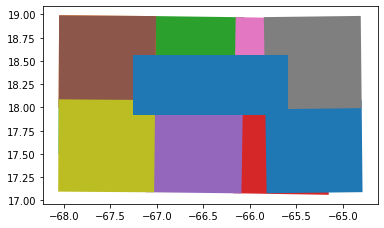

In [7]:
gdf = gpd.read_file(boundsdata)
f, ax = plt.subplots(1)
areas.plot(ax=ax, column = 'uuid', cmap = None,)
gdf.plot(ax=ax)
plt.show()

In [8]:
api.download('363e871c-6702-4441-ac79-faa330b2c715')

Product 363e871c-6702-4441-ac79-faa330b2c715 is not online. Triggering retrieval from long term archive.
Trying to download an offline product


SentinelAPILTAError: HTTP status 500 Internal Server Error: Trying to download an offline product

In [24]:
import zipfile
with zipfile.ZipFile('S2A_MSIL1C_20151225T150742_N0201_R082_T19QHV_20151225T150744.zip', 'r') as zip_ref:
    zip_ref.extractall(r'C:\python_workfolder\sentinel2images')